## Week 3 Peer Reviewed Assignment

In [ ]:
# Notebook for the final IBM Data Science Course from Coursera

In [1]:
# Import neccessary libraries

In [1]:

# library to handle data in a vectorized manner

import numpy as np

import pandas as pd
from pandas import DataFrame

# library to handle JSON files
import json 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors



# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

%matplotlib inline

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Webscraping using BeautifulSoup package

In [1734]:
# Import the BeautifulSoup package for web scraping
from bs4 import BeautifulSoup

In [1735]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [3]:
#Scrapethe wikipedia page for getting postal code of Canada
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")


In [4]:
#parsing the data
soup = BeautifulSoup(res.content,'html.parser')


In [23]:
#exploring the parsed html document
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"cb17fdae-6f3e-4e21-b25b-c0c99cf0d183","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":979555370,"wgRevisionId":979555370,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communicati

In [5]:
#Find the right table and converting the data to a dataframe
table = soup.find_all('table')[0]
df = pd.read_html(str(table))[0]


In [6]:
#Inspect the newly created dataframe
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [19]:
duplicates = df.pivot_table(index=['Postal Code'], aggfunc='size' )
print (duplicates)

Postal Code
M1A    1
M1B    1
M1C    1
M1E    1
M1G    1
      ..
M9V    1
M9W    1
M9X    1
M9Y    1
M9Z    1
Length: 180, dtype: int64


In [20]:
print(duplicates)

Postal Code
M1A    1
M1B    1
M1C    1
M1E    1
M1G    1
      ..
M9V    1
M9W    1
M9X    1
M9Y    1
M9Z    1
Length: 180, dtype: int64


In [22]:
df.duplicated(subset=['Postal Code'])

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [23]:
df['Postal Code'].nunique()

180

,Postal Code,Borough,Neighbourhood


In [16]:
#Alternative way of creating the dataframe (a long winded way. I'm only experimenting here!)

postalCodeList = []
boroughList = []
neighborhoodList = []


for row in soup.find('table').find_all('tr'):
    cells = []
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
            cells.append(column.get_text())
            column_marker += 1
          
    if(len(cells) > 0):
        postalCodeList.append(cells[0].rstrip('\n'))
        boroughList.append(cells[1].rstrip('\n'))
        neighborhoodList.append(cells[2].rstrip('\n'))
        
    
   
     

In [17]:
# creating the dataframe (in a alternative way) with the columns we want using pandas
toronto_df = pd.DataFrame({"PostalCode": postalCodeList,
                           "Borough": boroughList,
                           "Neighborhood": neighborhoodList})

In [1281]:
df[df['Borough'] == 'Not assigned'].count()

Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64

In [1283]:
df['Borough'].value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [29]:
df[df['Neighbourhood'] == 'Not assigned'].count()

Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64

In [31]:
#exploring the alternative dataframe
toronto_df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


## Dropping rows in Borough column with 'Not assigned' values  

In [32]:
#Dropping rows in Borough column with 'Not assigned' values  

df.drop(df[df['Borough'] == 'Not assigned'].index, inplace = True)

In [34]:
#checking if all the 'Not assigned' rows have indeed been dropped
df[df['Borough'] == 'Not assigned']

,Postal Code,Borough,Neighbourhood


In [35]:
df[df['Neighbourhood'] == 'Not assigned']

,Postal Code,Borough,Neighbourhood


In [76]:
df.info

<bound method DataFrame.info of     Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177       

In [77]:
df.columns

Index(['Postal Code', 'Borough', 'Neighbourhood'], dtype='object')

In [78]:
#removing any white spaces from the column names
df.columns = df.columns.str.strip()

## Combining Neighbourhoods in a single row with the same postal code 

In [79]:
#combining Neighbourhoods in a single row with the same postal code 
df_group = df.groupby(["Postal Code", "Borough"], as_index=False)['Neighbourhood'].agg(lambda x: ','.join(x))

In [80]:
df_group

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Malvern, Rouge"
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
...,...,...,...
175,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."
176,M9W,Etobicoke,"Northwest, West Humber - Clairville"
177,M9X,Not assigned,Not assigned
178,M9Y,Not assigned,Not assigned


In [81]:
pd.Series(df['Postal Code']).is_unique

True

In [82]:
df[df['Postal Code'] == 'M5A']

,Postal Code,Borough,Neighbourhood
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [83]:
duplicated =df[df.duplicated()]

In [84]:
duplicated

,Postal Code,Borough,Neighbourhood


In [87]:
df[df['Neighbourhood'] == 'Not assigned'].count()

Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64

In [88]:
df[df['Borough'] == 'Not assigned'].count()

Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64

In [89]:
#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
for a in df_group['Borough']:
    if a != 'Not assigned':
        Borough_na = a
        #print(a)
        for i in df_group['Neighbourhood']:
            #print(i)
            y = 0
            #neighbourhood_na = i
            #print(neighbourhood_na)
            if i == 'Not assigned':
                #print("I am here")
                neighbourhood_na = Borough_na
                #print(i)
                df_group.loc[y]['Neighbourhood'] = neighbourhood_na
                print(df_group.loc[y]['Neighbourhood'])
                y += 1
                

            
    


Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scar

Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
No

North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York

East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Cen

Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toron

Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central 

York
York
York
York
York
York
York
York
York
York
York
York
York
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto


Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke


Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke


## merging with geospatial data and reshaping the dataframe as asked in the assignment question

In [124]:
df_group

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Etobicoke
1,M1B,Scarborough,"Malvern, Rouge"
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn
...,...,...,...
175,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."
176,M9W,Etobicoke,"Northwest, West Humber - Clairville"
177,M9X,Not assigned,Not assigned
178,M9Y,Not assigned,Not assigned


In [125]:
#reshaping the dataframe in the way it's asked in the assignment
final_df_test = pd.DataFrame(columns = ['Postal Code', 'Borough', 'Neighbourhood']) 
print(final_df_test) 
  

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood]
Index: []


In [126]:
#reshaping the dataframe in the way it's asked in the assignment (continued)
post_code_list = ['M5G', 'M2H', 'M4B', 'M1J', 'M4G', 'M4M', 'M1R', 'M9V', 'M9L', 'M5V', 'M1B', 'M5A']

In [127]:
#reshaping the dataframe in the way it's asked in the assignment (continued)
for i in post_code_list:
    final_df_test = final_df_test.append(df_group_merged[df_group_merged['Postal Code'] ==  i]).reset_index(drop = True)

In [408]:
#Exploring the re-shaped dataframe
final_df_test

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
1,M2H,North York,Hillcrest Village,43.803762,-79.363452
2,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
3,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
4,M4G,East York,Leaside,43.709060,-79.363452
5,M4M,East Toronto,Studio District,43.659526,-79.340923
6,M1R,Scarborough,"Wexford, Maryvale",43.750072,-79.295849
7,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437
8,M9L,North York,Humber Summit,43.756303,-79.565963
9,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420


In [587]:
final_df_test.shape

(12, 5)

In [588]:
df_group.shape

(180, 3)

In [585]:
# using the Geospatial_Coordinates.csv to get respective coordinates for each postal code
df_geo = pd.read_csv("./Geospatial_Coordinates.csv")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [586]:
df_geo.shape

(103, 3)

In [130]:
#Exploring the geospatial dataframe with the grouped dataframe 
 = pd.merge(df_group,df_geo)

In [1794]:
df_group_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [1799]:
df_group_merged.shape

(103, 5)

# Exploratory Analysis

### Visualing the number of Neighbourhood

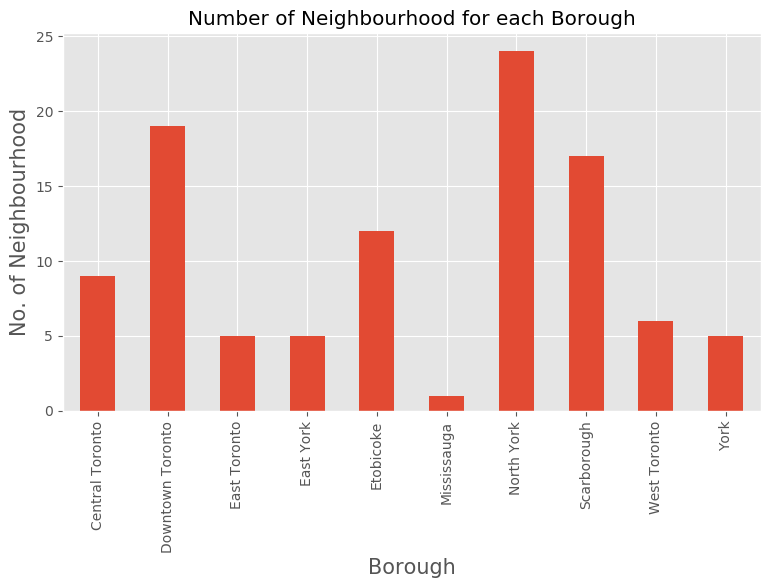

In [1801]:
plt.figure(figsize = (9,5), dpi = 100)
#title
plt.title('Number of Neighbourhood for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No. of Neighbourhood', fontsize = 15)
#plotting a bar chart
df_group_merged.groupby('Borough')['Neighbourhood'].count().plot(kind = 'bar')

### South Asian Population Census Exploration (Looking into the population splits across the neighbourhood)

In [1802]:
# using the Neighbourhood profile for Toronto
df_np = pd.read_csv("./neighbourhood-profiles-2016-csv.csv")
df_np.head(50)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
5,6,Population,Population and dwellings,Census Profile 98-316-X2016001,Total private dwellings,"1,179,057","9,371","8,535","4,732","18,109",...,"8,054","8,721","19,098","5,620","3,604","6,185","6,103","7,475","11,051","5,847"
6,7,Population,Population and dwellings,Census Profile 98-316-X2016001,Private dwellings occupied by usual residents,"1,112,929","9,120","8,136","4,616","15,934",...,"7,549","8,509","18,436","5,454","3,449","5,887","5,676","7,012","10,170","5,344"
7,8,Population,Population and dwellings,Census Profile 98-316-X2016001,Population density per square kilometre,"4,334","3,929","3,034","2,435","10,863",...,"5,820","4,007","4,345","7,838","6,722","8,541","7,162","10,708","2,086","2,451"
8,9,Population,Population and dwellings,Census Profile 98-316-X2016001,Land area in square kilometres,630.2,7.41,7.83,4.95,2.81,...,2.91,5.53,12.31,1.6,1.17,1.68,1.65,1.17,13.23,6.04
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"


In [1803]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [1804]:
missing_values_table(df_np)

Your selected dataframe has 146 columns.
There are 141 columns that have missing values.


,Missing Values,% of Total Values
Lawrence Park South,56,2.3
Pelmo Park-Humberlea,56,2.3
Oakridge,56,2.3
Oakwood Village,56,2.3
O'Connor-Parkview,56,2.3
...,...,...
Eringate-Centennial-West Deane,56,2.3
Englemount-Lawrence,56,2.3
Elms-Old Rexdale,56,2.3
Eglinton East,56,2.3


In [1805]:
column_name = df_np.columns.values.tolist() 

['_id',
 'Category',
 'Topic',
 'Data Source',
 'Characteristic',
 'City of Toronto',
 'Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Ce

In [1807]:
df_np[column_name] = df_np[column_name].replace(',','', regex=True)

In [1808]:
df_np['Characteristic'] = df_np['Characteristic'].map(lambda x: x.strip())

In [1809]:
df_np['City of Toronto'].isna().sum()

7

In [1810]:
df_np.isna().sum()

_id                         0
Category                    0
Topic                       0
Data Source                 0
Characteristic              0
                           ..
Wychwood                   56
Yonge-Eglinton             56
Yonge-St.Clair             56
York University Heights    56
Yorkdale-Glen Park         56
Length: 146, dtype: int64

In [1811]:
df_np[column_name] = df_np[column_name].fillna(0)

In [1812]:
df_np.query("Category == 'Ethnic origin' & Topic == 'Ethnic origin population' & Characteristic == 'Bangladeshi'").loc[[df_np['Characteristic']=='Bangladeshi'],:]

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
1583,1584,Ethnic origin,Ethnic origin population,Census Profile 98-316-X2016001,Bangladeshi,18155,10,80,0,35,...,25,20,590,15,30,15,10,10,95,10


In [1813]:
df_np.query("Category == 'Ethnic origin' & Topic == 'Ethnic origin population' & Characteristic == 'Bangladeshi'").groupby('Characteristic')[['City of Toronto']].sum()

,City of Toronto
Characteristic,
Bangladeshi,18155


In [1814]:
df_np.query("Category == 'Ethnic origin' & Topic == 'Ethnic origin population'& Characteristic == 'Bangladeshi'").groupby('Characteristic')['City of Toronto'].sum()

Characteristic
Bangladeshi    18155
Name: City of Toronto, dtype: object

In [1815]:
del column_name[1:5]

In [1816]:
column_name.remove('_id')

In [1833]:
a =df_np.query("Category == 'Ethnic origin' & Topic == 'Ethnic origin population'").groupby('Characteristic')[column_name].sum()

In [1834]:
a

C:\Users\qazi.mussabbir\Anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,
Aboriginal from Central/South America (except Arawak and Maya),4495,50,20,0,25,10,20,20,40,25,...,20,0,105,20,0,35,10,20,125,15
Acadian,2315,20,0,10,60,0,10,55,10,0,...,0,0,10,45,20,30,10,0,10,0
Afghan,20915,85,255,10,35,70,50,35,145,25,...,45,95,1280,0,0,0,10,35,340,15
African origins,146875,535,625,215,1040,990,600,1135,640,415,...,280,1910,2470,530,245,610,310,370,2450,820
Afrikaner,185,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yoruba,1105,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,0,0,0,70,0
Yugoslavian; n.o.s.,3310,0,0,50,65,20,10,25,25,10,...,25,20,10,0,15,30,20,25,20,10
Zambian,170,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1836]:
a['City of Toronto'].apply(pd.to_numeric)

Characteristic
Aboriginal from Central/South America (except Arawak and Maya)      4495
Acadian                                                             2315
Afghan                                                             20915
African origins                                                   146875
Afrikaner                                                            185
                                                                   ...  
Yoruba                                                              1105
Yugoslavian; n.o.s.                                                 3310
Zambian                                                              170
Zimbabwean                                                          1025
Zulu                                                                 140
Name: City of Toronto, Length: 279, dtype: int64

In [1842]:
a= a[column_name].apply(pd.to_numeric)

In [1845]:
a = a.transpose()

In [1846]:
a

Characteristic,Aboriginal from Central/South America (except Arawak and Maya),Acadian,Afghan,African origins,Afrikaner,Akan,Albanian,Algerian,Alsatian,American,...,West Indian; n.o.s.,Western European origins (except French origins),Western European origins; n.i.e.,Wolof,Yemeni,Yoruba,Yugoslavian; n.o.s.,Zambian,Zimbabwean,Zulu
City of Toronto,4495,2315,20915,146875,185,460,11120,895,265,27470,...,20315,187190,340,45,1405,1105,3310,170,1025,140
Agincourt North,50,20,85,535,0,0,0,0,0,40,...,235,350,0,10,15,0,0,0,0,0
Agincourt South-Malvern West,20,0,255,625,0,15,0,0,0,70,...,220,425,0,0,0,0,0,0,0,0
Alderwood,0,10,10,215,0,0,120,10,0,100,...,75,1150,0,0,0,0,50,0,35,0
Annex,25,60,35,1040,0,0,115,20,0,705,...,70,4310,10,10,0,0,65,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,35,30,0,610,0,0,65,0,10,275,...,95,1505,0,0,0,0,30,0,0,0
Yonge-Eglinton,10,10,10,310,0,0,35,0,0,320,...,40,1610,0,0,15,0,20,0,0,0
Yonge-St.Clair,20,0,35,370,0,0,35,0,0,280,...,25,1845,0,0,0,0,25,0,0,0
York University Heights,125,10,340,2450,0,10,150,0,0,175,...,380,735,0,10,0,70,20,0,20,0


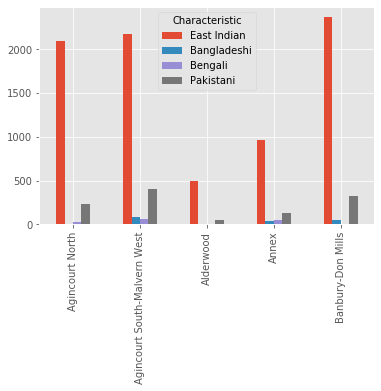

In [1865]:
a.loc['Agincourt North':, ['East Indian', 'Bangladeshi', 'Bengali', 'Pakistani', ]].head(5).plot(kind = 'bar')

In [135]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [1792]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(final_df['Latitude'], final_df['Longitude'], final_df['Borough'], final_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [1793]:
# create map of New York using latitude and longitude values
map_toronto_full = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_group_merged['Latitude'], df_group_merged['Longitude'], df_group_merged['Borough'], df_group_merged['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_full)  
    
map_toronto_full

In [105]:
CLIENT_ID = 'DJ3WT0BU4G01WASVHSNKMJME24MVFZNPXUGULBP30MRNXZAL' # your Foursquare ID
CLIENT_SECRET = 'VHRAWJ3PLFPUSI5HEPHUXQSQU510SFS5PSVG05VCGFXEFRKV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DJ3WT0BU4G01WASVHSNKMJME24MVFZNPXUGULBP30MRNXZAL
CLIENT_SECRET:VHRAWJ3PLFPUSI5HEPHUXQSQU510SFS5PSVG05VCGFXEFRKV


In [111]:
neighborhood_latitude = df_group_merged.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_group_merged.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_group_merged.loc[0, 'Neighbourhood'] # neighborhood name

In [113]:
search_query = 'Indian'
radius = 500
print(search_query + ' .... OK!')

Indian .... OK!


In [118]:
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=DJ3WT0BU4G01WASVHSNKMJME24MVFZNPXUGULBP30MRNXZAL&client_secret=VHRAWJ3PLFPUSI5HEPHUXQSQU510SFS5PSVG05VCGFXEFRKV&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [119]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd5064e383e6d764f30aacf'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': 'Wendy’s',
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [121]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [122]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON# filter columns



filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\qazi.mussabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


In [1539]:
#Function to extract the nearby venues name and venue categories for each of the neighhbourhood
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        # return only relevant information for each nearby venue
    # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
          

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
          

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print(venues_list)
    return(nearby_venues)


In [638]:
#Function to extract the nearby venues name and venue categories for each of the neighhbourhood. 
#Function similar as the one above, but this is more specifically created to be used for finding the total number of South Asian restaurants across the neighbourhoods


def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
   # CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
    #CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [1540]:
# Getting the nearby venues 
toronto_venues = getNearbyVenues(names = df_group_merged['Neighbourhood'], latitudes = df_group_merged['Latitude'], longitudes=df_group_merged['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [1873]:
print(toronto_venues.shape)
toronto_venues

(4878, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Malvern, Rouge",43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant
2,"Malvern, Rouge",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,"Malvern, Rouge",43.806686,-79.194353,RBC Royal Bank,43.798782,-79.197090,Bank
4,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
...,...,...,...,...,...,...,...
4873,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,46 Martingrove North,43.732211,-79.589618,Bus Line
4874,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,Panorama Park,43.747021,-79.583497,Park
4875,"Northwest, West Humber - Clairville",43.706748,-79.594054,Tim Hortons,43.714657,-79.593716,Coffee Shop
4876,"Northwest, West Humber - Clairville",43.706748,-79.594054,Saand Rexdale,43.705072,-79.598725,Drugstore


In [1502]:
#Number of unique categories 

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


In [1678]:
toronto_venues['Venue Category'].unique()

array(['Spa', 'Restaurant', 'Fast Food Restaurant', 'Bank',
       'Caribbean Restaurant', 'Paper / Office Supplies Store',
       'Coffee Shop', 'Hardware Store', 'Hobby Shop',
       'Martial Arts School', 'Trail', 'Chinese Restaurant', 'Gym',
       'Supermarket', 'Bakery', 'Sandwich Place', 'Italian Restaurant',
       'Burger Joint', 'Breakfast Spot', 'Playground', 'Park',
       'Fried Chicken Joint', 'Liquor Store', 'Pizza Place',
       'Food & Drink Shop', 'Smoothie Shop', 'Beer Store', 'Sports Bar',
       'Greek Restaurant', 'Pharmacy', 'Discount Store',
       'Salon / Barbershop', 'Filipino Restaurant', 'Convenience Store',
       'Indian Restaurant', 'Mobile Phone Shop', 'Hakka Restaurant',
       'Thai Restaurant', 'Athletics & Sports', 'Music Store',
       'Gas Station', 'Yoga Studio', 'Grocery Store', 'Wings Joint',
       'Lounge', 'Bus Line', 'Sporting Goods Shop', 'Ice Cream Shop',
       'Japanese Restaurant', 'Bowling Alley', 'Department Store',
       'Bus Stati

In [1868]:
rest_df = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant")]

In [1871]:
#Unique type of restaurants

len(rest_df['Venue Category'].unique())

60

In [1711]:
rest_list = rest_df['Venue Category'].values.tolist()

In [1713]:
rest_list

['Restaurant',
 'Fast Food Restaurant',
 'Fast Food Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Italian Restaurant',
 'Restaurant',
 'Fast Food Restaurant',
 'Greek Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Indian Restaurant',
 'Caribbean Restaurant',
 'Indian Restaurant',
 'Hakka Restaurant',
 'Thai Restaurant',
 'Indian Restaurant',
 'Chinese Restaurant',
 'Restaurant',
 'Fast Food Restaurant',
 'Restaurant',
 'Japanese Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Asian Restaurant',
 'Restaurant',
 'Mexican Restaurant',
 'Fast Food Restaurant',
 'Restaurant',
 'Thai Restaurant',
 'Restaurant',
 'Asian Restaurant',
 'Chinese Restaurant',
 'Chinese Restaurant',
 'Indian Restaurant',
 'Restaurant',
 'Italian Restaurant',
 'Indian Restaurant',
 'Vietnamese Restaurant',
 'Restaurant',
 'Fa

In [1872]:
#Total number of restaurant within the dataframe rest_df
len(rest_list)

1192

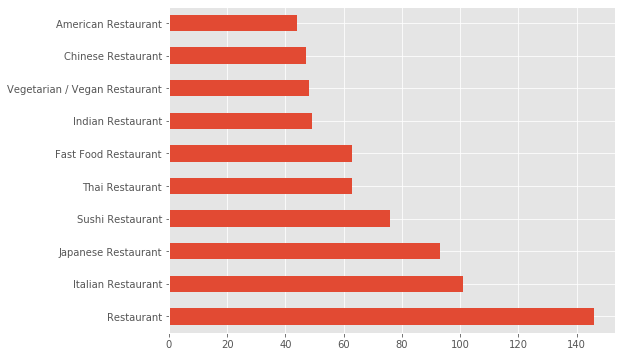

In [1750]:
rest_df['Venue Category'].value_counts().head(10).plot(kind='barh', figsize=(8, 6))

730


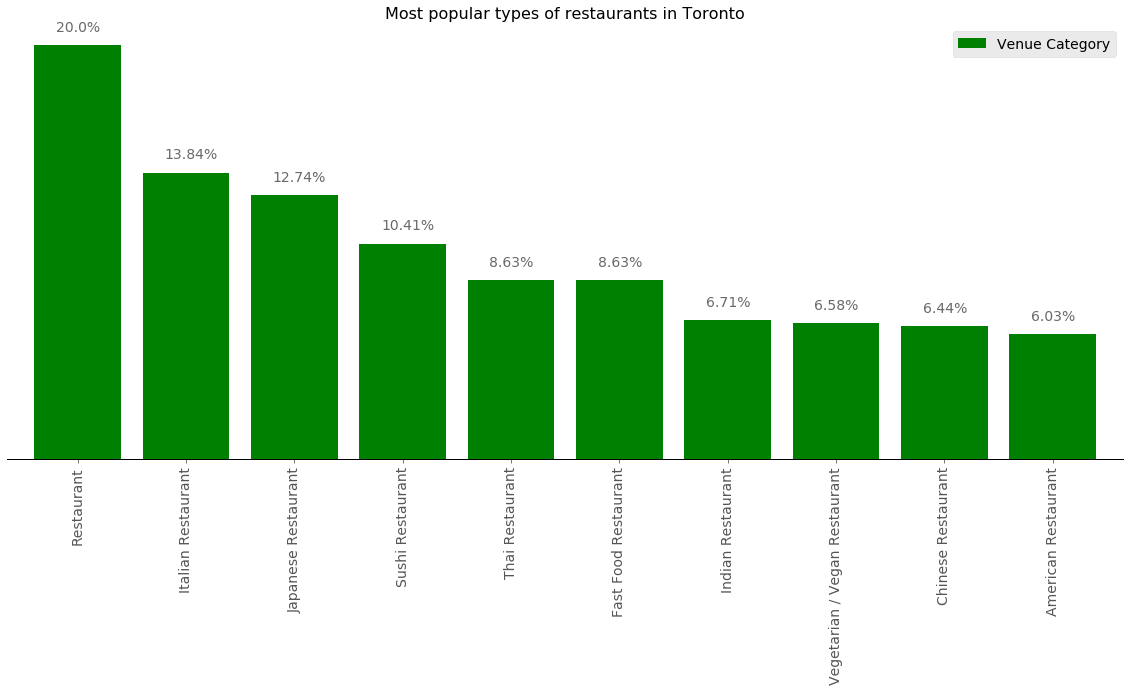

In [1783]:

#c=["#5cb85c","#5bc0de","#d9534f"]
fig = plt.figure()
ax = fig.add_subplot()
ax = rest_df['Venue Category'].value_counts().head(10).plot(kind='bar', width=0.8, color = 'green',figsize = (20,8),  fontsize=14)


ax.set_title("Most popular types of restaurants in Toronto", fontsize=16)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')

ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')
ax.set_facecolor("white")

ax.set_yticks([])
plt.grid(b=None)

ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.legend(prop={'size': 14})


totals = []


for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)
print(total)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+5.0, 
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='dimgrey')
    


730


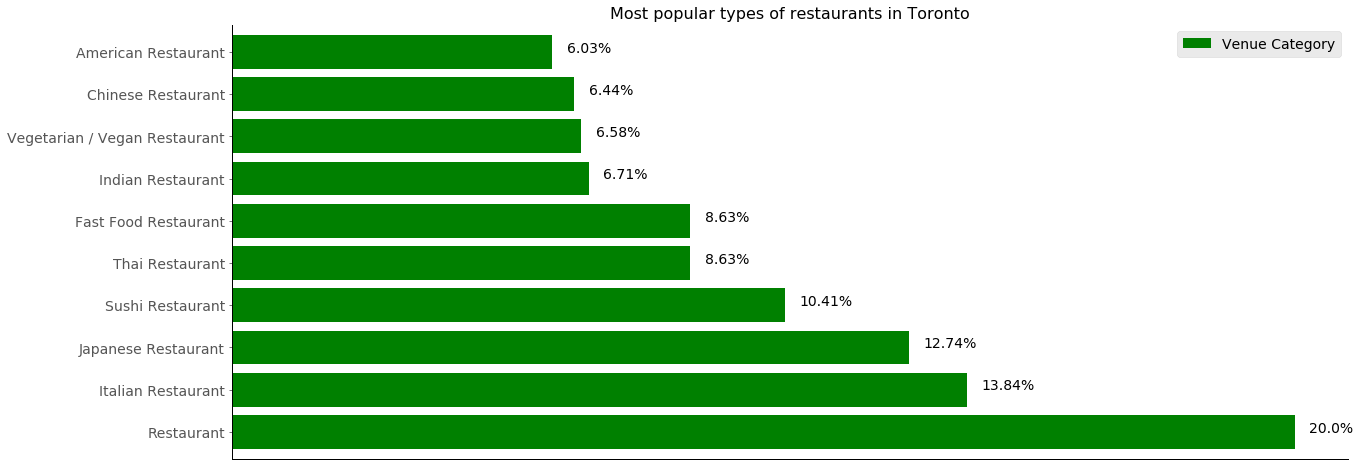

In [1874]:
#c=["#5cb85c","#5bc0de","#d9534f"]
fig = plt.figure()
ax = fig.add_subplot()
ax = rest_df['Venue Category'].value_counts().head(10).plot(kind='barh', width=0.8, color = 'green',figsize = (20,8),  fontsize=14)


ax.set_title("Most popular types of restaurants in Toronto", fontsize=16)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')

ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')
ax.set_facecolor("white")

ax.set_xticks([])
plt.grid(b=None)

ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.legend(prop={'size': 14})


totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)
print(total)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text( i.get_x()+ i.get_width() +2.0, i.get_y()+ i.get_height()/2,
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=14,
                color='black')
    

In [593]:
df_group_merged.values.tolist()

[['M1B',
  'Scarborough',
  'Malvern, Rouge',
  43.806686299999996,
  -79.19435340000001],
 ['M1C',
  'Scarborough',
  'Rouge Hill, Port Union, Highland Creek',
  43.7845351,
  -79.16049709999999],
 ['M1E',
  'Scarborough',
  'Guildwood, Morningside, West Hill',
  43.7635726,
  -79.1887115],
 ['M1G', 'Scarborough', 'Woburn', 43.7709921, -79.21691740000001],
 ['M1H', 'Scarborough', 'Cedarbrae', 43.773136, -79.23947609999999],
 ['M1J', 'Scarborough', 'Scarborough Village', 43.7447342, -79.23947609999999],
 ['M1K',
  'Scarborough',
  'Kennedy Park, Ionview, East Birchmount Park',
  43.7279292,
  -79.26202940000002],
 ['M1L',
  'Scarborough',
  'Golden Mile, Clairlea, Oakridge',
  43.711111700000004,
  -79.2845772],
 ['M1M',
  'Scarborough',
  'Cliffside, Cliffcrest, Scarborough Village West',
  43.716316,
  -79.23947609999999],
 ['M1N',
  'Scarborough',
  'Birch Cliff, Cliffside West',
  43.692657000000004,
  -79.2648481],
 ['M1P',
  'Scarborough',
  'Dorset Park, Wexford Heights, Scarbor

In [751]:
#Making a Neighbourhood list containing Indian restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name']
Indian_rest_to = pd.DataFrame(columns = column_names)
count = 1
for row in df_group_merged.values.tolist():
    PostalCode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant'] 
    print('(',count,'/',len(df_group_merged),')','Indian Resturants in '+Neighbourhood+','+Borough+':'+str(len(indian_resturants)))
    #print('(',count,'/',len(df_group_merged),')','Indian Restaurant in '+Neighbourhood+','+Borough+':'+str(len(indian_restaurants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        Indian_rest_to = Indian_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                                },ignore_index=True)
    count+=1
    
  
        
   
        
    
    
    
    
    

( 1 / 103 ) Indian Resturants in Malvern, Rouge,Scarborough:0
( 2 / 103 ) Indian Resturants in Rouge Hill, Port Union, Highland Creek,Scarborough:0
( 3 / 103 ) Indian Resturants in Guildwood, Morningside, West Hill,Scarborough:0
( 4 / 103 ) Indian Resturants in Woburn,Scarborough:1
( 5 / 103 ) Indian Resturants in Cedarbrae,Scarborough:2
( 6 / 103 ) Indian Resturants in Scarborough Village,Scarborough:0
( 7 / 103 ) Indian Resturants in Kennedy Park, Ionview, East Birchmount Park,Scarborough:0
( 8 / 103 ) Indian Resturants in Golden Mile, Clairlea, Oakridge,Scarborough:0
( 9 / 103 ) Indian Resturants in Cliffside, Cliffcrest, Scarborough Village West,Scarborough:0
( 10 / 103 ) Indian Resturants in Birch Cliff, Cliffside West,Scarborough:0
( 11 / 103 ) Indian Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre,Scarborough:2
( 12 / 103 ) Indian Resturants in Wexford, Maryvale,Scarborough:1
( 13 / 103 ) Indian Resturants in Agincourt,Scarborough:1
( 14 / 103 ) Indian Restur

In [752]:
Indian_rest_to.head(-1)

,Borough,Neighborhood,ID,Name
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant
5,Scarborough,"Wexford, Maryvale",4c27cddd9fb5d13a8cab9857,Patna Kebab House
6,Scarborough,Agincourt,4d570727fb65236a7f600db4,Silver Spoon Pak-Indian Restaurant
7,Scarborough,"Steeles West, L'Amoreaux West",4efccc9bb8f701ff611ce191,Nantha's Bakery
8,North York,"Willowdale, Newtonbrook",4b43dde2f964a52099ec25e3,Earth Indian Restaurant
9,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro


In [783]:
#Making a Neighbourhood list containing Bangladeshi restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name']
bangladeshi_rest_to = pd.DataFrame(columns = column_names)
count = 1
for row in df_group_merged.values.tolist():
    PostalCode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    bangladeshi_resturants=venues[venues['Category']=='Bangladeshi'] 
    print('(',count,'/',len(df_group_merged),')','Bangladeshi Resturants in '+Neighbourhood+','+Borough+':'+str(len(indian_resturants)))
    #print('(',count,'/',len(df_group_merged),')','Indian Restaurant in '+Neighbourhood+','+Borough+':'+str(len(indian_restaurants)))
    for resturant_detail in bangladeshi_resturants.values.tolist():
        id, name , category=resturant_detail
        bangladeshi_rest_to = Indian_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                                },ignore_index=True)
    count+=1
    
  
        
   
        
    
    
    
    
    

( 1 / 103 ) Bangladeshi Resturants in Malvern, Rouge,Scarborough:0
( 2 / 103 ) Bangladeshi Resturants in Rouge Hill, Port Union, Highland Creek,Scarborough:0
( 3 / 103 ) Bangladeshi Resturants in Guildwood, Morningside, West Hill,Scarborough:0
( 4 / 103 ) Bangladeshi Resturants in Woburn,Scarborough:0
( 5 / 103 ) Bangladeshi Resturants in Cedarbrae,Scarborough:0
( 6 / 103 ) Bangladeshi Resturants in Scarborough Village,Scarborough:0
( 7 / 103 ) Bangladeshi Resturants in Kennedy Park, Ionview, East Birchmount Park,Scarborough:0
( 8 / 103 ) Bangladeshi Resturants in Golden Mile, Clairlea, Oakridge,Scarborough:0
( 9 / 103 ) Bangladeshi Resturants in Cliffside, Cliffcrest, Scarborough Village West,Scarborough:0
( 10 / 103 ) Bangladeshi Resturants in Birch Cliff, Cliffside West,Scarborough:0
( 11 / 103 ) Bangladeshi Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre,Scarborough:0
( 12 / 103 ) Bangladeshi Resturants in Wexford, Maryvale,Scarborough:0
( 13 / 103 ) Bangladeshi

( 99 / 103 ) Bangladeshi Resturants in Weston,York:0
( 100 / 103 ) Bangladeshi Resturants in Westmount,Etobicoke:0
( 101 / 103 ) Bangladeshi Resturants in Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens,Etobicoke:0
( 102 / 103 ) Bangladeshi Resturants in South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens,Etobicoke:0
( 103 / 103 ) Bangladeshi Resturants in Northwest, West Humber - Clairville,Etobicoke:0


In [1186]:
df_group_merged.groupby('Borough')['Neighbourhood'].count()


Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64

In [768]:
bangladeshi_rest_to['Borough'].value_counts()

Series([], Name: Borough, dtype: int64)

In [785]:
#Making a Neighbourhood list containing Pakistani restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name']
pakistani_rest_to = pd.DataFrame(columns = column_names)
count = 1
for row in df_group_merged.values.tolist():
    PostalCode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    pakistani_resturants=venues[venues['Category']=='Pakistani'] 
    print('(',count,'/',len(df_group_merged),')','Pakistani Resturants in '+Neighbourhood+','+Borough+':'+str(len(indian_resturants)))
    #print('(',count,'/',len(df_group_merged),')','Indian Restaurant in '+Neighbourhood+','+Borough+':'+str(len(indian_restaurants)))
    for resturant_detail in pakistani_resturants.values.tolist():
        id, name , category=resturant_detail
        pakistani_rest_to = pakistani_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                                },ignore_index=True)
    count+=1
    
  
        
   

( 1 / 103 ) Pakistani Resturants in Malvern, Rouge,Scarborough:0
( 2 / 103 ) Pakistani Resturants in Rouge Hill, Port Union, Highland Creek,Scarborough:0
( 3 / 103 ) Pakistani Resturants in Guildwood, Morningside, West Hill,Scarborough:0
( 4 / 103 ) Pakistani Resturants in Woburn,Scarborough:0
( 5 / 103 ) Pakistani Resturants in Cedarbrae,Scarborough:0
( 6 / 103 ) Pakistani Resturants in Scarborough Village,Scarborough:0
( 7 / 103 ) Pakistani Resturants in Kennedy Park, Ionview, East Birchmount Park,Scarborough:0
( 8 / 103 ) Pakistani Resturants in Golden Mile, Clairlea, Oakridge,Scarborough:0
( 9 / 103 ) Pakistani Resturants in Cliffside, Cliffcrest, Scarborough Village West,Scarborough:0
( 10 / 103 ) Pakistani Resturants in Birch Cliff, Cliffside West,Scarborough:0
( 11 / 103 ) Pakistani Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre,Scarborough:0
( 12 / 103 ) Pakistani Resturants in Wexford, Maryvale,Scarborough:0
( 13 / 103 ) Pakistani Resturants in Agincourt,S

( 102 / 103 ) Pakistani Resturants in South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens,Etobicoke:0
( 103 / 103 ) Pakistani Resturants in Northwest, West Humber - Clairville,Etobicoke:0


In [786]:
pakistani_rest_to

,Borough,Neighborhood,ID,Name


In [772]:
Indian_rest_to['Neighborhood'].value_counts().nlargest(10)

India Bazaar, The Beaches West                           6
Davisville                                               3
Thorncliffe Park                                         3
Canada Post Gateway Processing Centre                    2
Christie                                                 2
Regent Park, Harbourfront                                2
Church and Wellesley                                     2
Brockton, Parkdale Village, Exhibition Place             2
Dorset Park, Wexford Heights, Scarborough Town Centre    2
Cedarbrae                                                2
Name: Neighborhood, dtype: int64

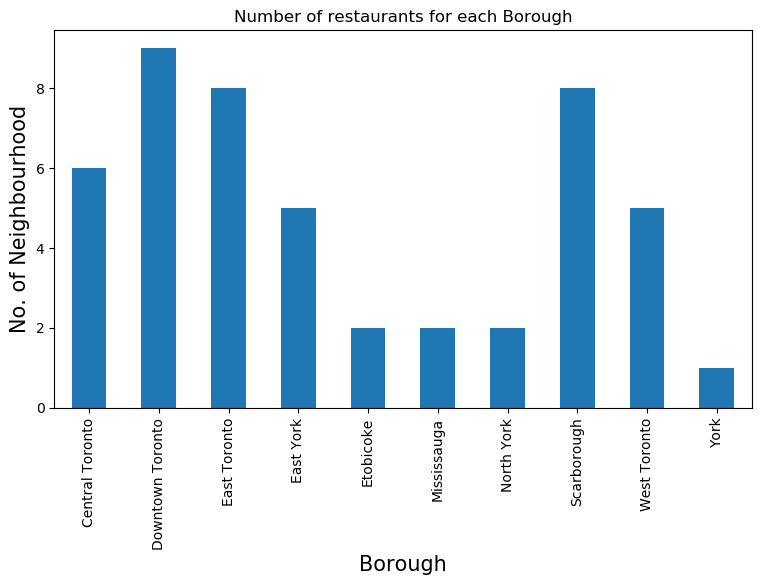

In [1238]:
plt.figure(figsize = (9,5), dpi = 100)
#title
plt.title('Number of restaurants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No. of Neighbourhood', fontsize = 15)
#plotting a bar chart
#df_group_merged.groupby('Borough')['Neighbourhood'].count().plot(kind = 'bar')
Indian_rest_to.groupby('Borough')['ID'].count().plot(kind = 'bar')

In [978]:
Indian_rest_to.groupby('Borough')['ID'].count()

Borough
Central Toronto     6
Downtown Toronto    9
East Toronto        8
East York           5
Etobicoke           2
Mississauga         2
North York          2
Scarborough         8
West Toronto        5
York                1
Name: ID, dtype: int64

In [1292]:
Indian_rest_to.head()

,Borough,Neighborhood,ID,Name
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant


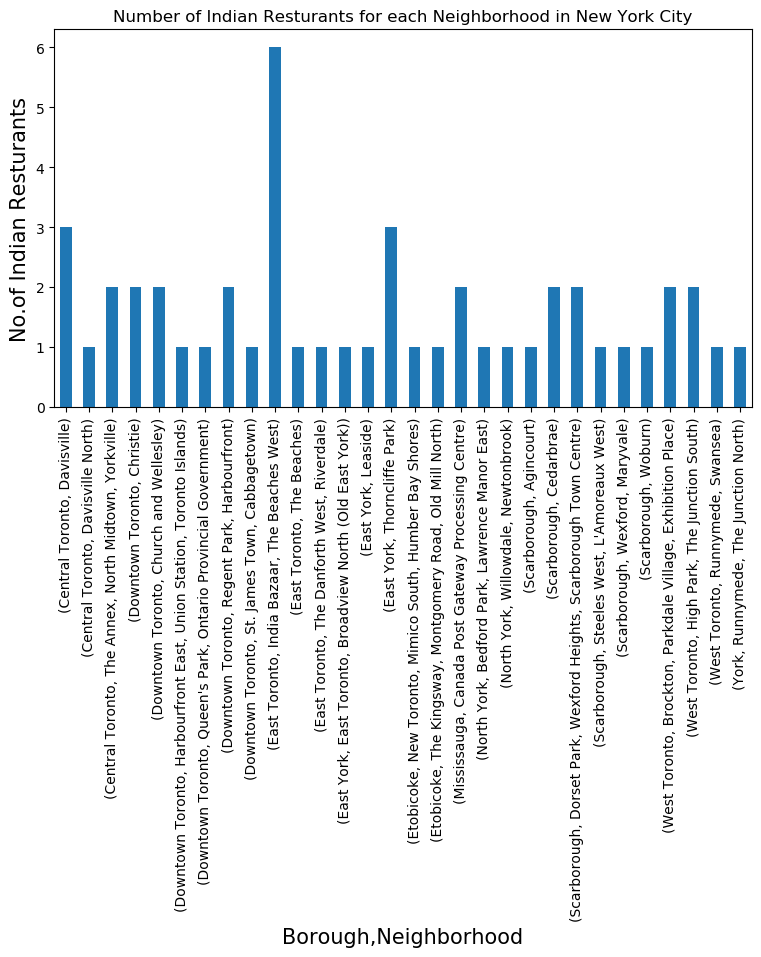

In [1675]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#plotting a bar chart
#df_group_merged.groupby('Borough')['Neighbourhood'].count().plot(kind = 'bar')
Indian_rest_to.groupby(['Borough','Neighborhood'])['ID'].count().plot(kind = 'bar')

In [1279]:
Indian_rest_to.groupby(['Borough','Neighborhood'])['ID'].count().nlargest(10)

Borough           Neighborhood                                         
East Toronto      India Bazaar, The Beaches West                           6
Central Toronto   Davisville                                               3
East York         Thorncliffe Park                                         3
Central Toronto   The Annex, North Midtown, Yorkville                      2
Downtown Toronto  Christie                                                 2
                  Church and Wellesley                                     2
                  Regent Park, Harbourfront                                2
Mississauga       Canada Post Gateway Processing Centre                    2
Scarborough       Cedarbrae                                                2
                  Dorset Park, Wexford Heights, Scarborough Town Centre    2
Name: ID, dtype: int64

### Creating Folium map and using the Four Square API to get venue data for each of the neighbourhood latitude and longtitude

In [135]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [1792]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(final_df['Latitude'], final_df['Longitude'], final_df['Borough'], final_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [1793]:
# create map of New York using latitude and longitude values
map_toronto_full = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_group_merged['Latitude'], df_group_merged['Longitude'], df_group_merged['Borough'], df_group_merged['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_full)  
    
map_toronto_full

In [105]:
CLIENT_ID = 'DJ3WT0BU4G01WASVHSNKMJME24MVFZNPXUGULBP30MRNXZAL' # your Foursquare ID
CLIENT_SECRET = 'VHRAWJ3PLFPUSI5HEPHUXQSQU510SFS5PSVG05VCGFXEFRKV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DJ3WT0BU4G01WASVHSNKMJME24MVFZNPXUGULBP30MRNXZAL
CLIENT_SECRET:VHRAWJ3PLFPUSI5HEPHUXQSQU510SFS5PSVG05VCGFXEFRKV


In [111]:
neighborhood_latitude = df_group_merged.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_group_merged.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_group_merged.loc[0, 'Neighbourhood'] # neighborhood name

In [113]:
search_query = 'Indian'
radius = 500
print(search_query + ' .... OK!')

Indian .... OK!


In [118]:
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=DJ3WT0BU4G01WASVHSNKMJME24MVFZNPXUGULBP30MRNXZAL&client_secret=VHRAWJ3PLFPUSI5HEPHUXQSQU510SFS5PSVG05VCGFXEFRKV&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [119]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd5064e383e6d764f30aacf'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': 'Wendy’s',
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [121]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [122]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON# filter columns



filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\qazi.mussabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


In [1539]:
#Function to extract the nearby venues name and venue categories for each of the neighhbourhood
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        # return only relevant information for each nearby venue
    # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
          

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
          

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print(venues_list)
    return(nearby_venues)


In [638]:
#Function to extract the nearby venues name and venue categories for each of the neighhbourhood. 
#Function similar as the one above, but this is more specifically created to be used for finding the total number of South Asian restaurants across the neighbourhoods


def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
   # CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
    #CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [1540]:
# Getting the nearby venues 
toronto_venues = getNearbyVenues(names = df_group_merged['Neighbourhood'], latitudes = df_group_merged['Latitude'], longitudes=df_group_merged['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [1873]:
print(toronto_venues.shape)
toronto_venues

(4878, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Malvern, Rouge",43.806686,-79.194353,Harvey's,43.800020,-79.198307,Restaurant
2,"Malvern, Rouge",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,"Malvern, Rouge",43.806686,-79.194353,RBC Royal Bank,43.798782,-79.197090,Bank
4,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
...,...,...,...,...,...,...,...
4873,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,46 Martingrove North,43.732211,-79.589618,Bus Line
4874,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,Panorama Park,43.747021,-79.583497,Park
4875,"Northwest, West Humber - Clairville",43.706748,-79.594054,Tim Hortons,43.714657,-79.593716,Coffee Shop
4876,"Northwest, West Humber - Clairville",43.706748,-79.594054,Saand Rexdale,43.705072,-79.598725,Drugstore


In [1502]:
#Number of unique categories 

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


In [1678]:
toronto_venues['Venue Category'].unique()

array(['Spa', 'Restaurant', 'Fast Food Restaurant', 'Bank',
       'Caribbean Restaurant', 'Paper / Office Supplies Store',
       'Coffee Shop', 'Hardware Store', 'Hobby Shop',
       'Martial Arts School', 'Trail', 'Chinese Restaurant', 'Gym',
       'Supermarket', 'Bakery', 'Sandwich Place', 'Italian Restaurant',
       'Burger Joint', 'Breakfast Spot', 'Playground', 'Park',
       'Fried Chicken Joint', 'Liquor Store', 'Pizza Place',
       'Food & Drink Shop', 'Smoothie Shop', 'Beer Store', 'Sports Bar',
       'Greek Restaurant', 'Pharmacy', 'Discount Store',
       'Salon / Barbershop', 'Filipino Restaurant', 'Convenience Store',
       'Indian Restaurant', 'Mobile Phone Shop', 'Hakka Restaurant',
       'Thai Restaurant', 'Athletics & Sports', 'Music Store',
       'Gas Station', 'Yoga Studio', 'Grocery Store', 'Wings Joint',
       'Lounge', 'Bus Line', 'Sporting Goods Shop', 'Ice Cream Shop',
       'Japanese Restaurant', 'Bowling Alley', 'Department Store',
       'Bus Stati

In [1868]:
rest_df = toronto_venues[toronto_venues['Venue Category'].str.contains("Restaurant")]

In [1871]:
#Unique type of restaurants

len(rest_df['Venue Category'].unique())

60

In [1711]:
rest_list = rest_df['Venue Category'].values.tolist()

In [1713]:
rest_list

['Restaurant',
 'Fast Food Restaurant',
 'Fast Food Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Italian Restaurant',
 'Restaurant',
 'Fast Food Restaurant',
 'Greek Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Indian Restaurant',
 'Caribbean Restaurant',
 'Indian Restaurant',
 'Hakka Restaurant',
 'Thai Restaurant',
 'Indian Restaurant',
 'Chinese Restaurant',
 'Restaurant',
 'Fast Food Restaurant',
 'Restaurant',
 'Japanese Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Fast Food Restaurant',
 'Chinese Restaurant',
 'Asian Restaurant',
 'Restaurant',
 'Mexican Restaurant',
 'Fast Food Restaurant',
 'Restaurant',
 'Thai Restaurant',
 'Restaurant',
 'Asian Restaurant',
 'Chinese Restaurant',
 'Chinese Restaurant',
 'Indian Restaurant',
 'Restaurant',
 'Italian Restaurant',
 'Indian Restaurant',
 'Vietnamese Restaurant',
 'Restaurant',
 'Fa

In [1872]:
#Total number of restaurant within the dataframe rest_df
len(rest_list)

1192

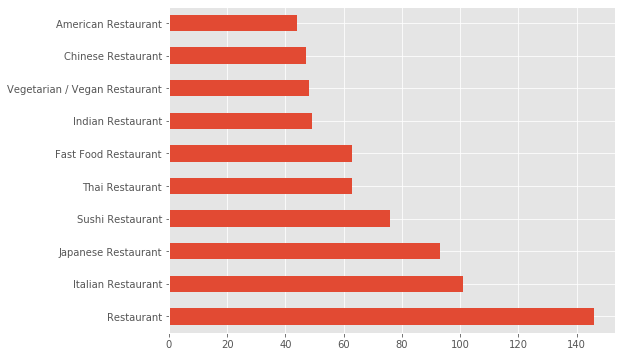

In [1750]:
rest_df['Venue Category'].value_counts().head(10).plot(kind='barh', figsize=(8, 6))

730


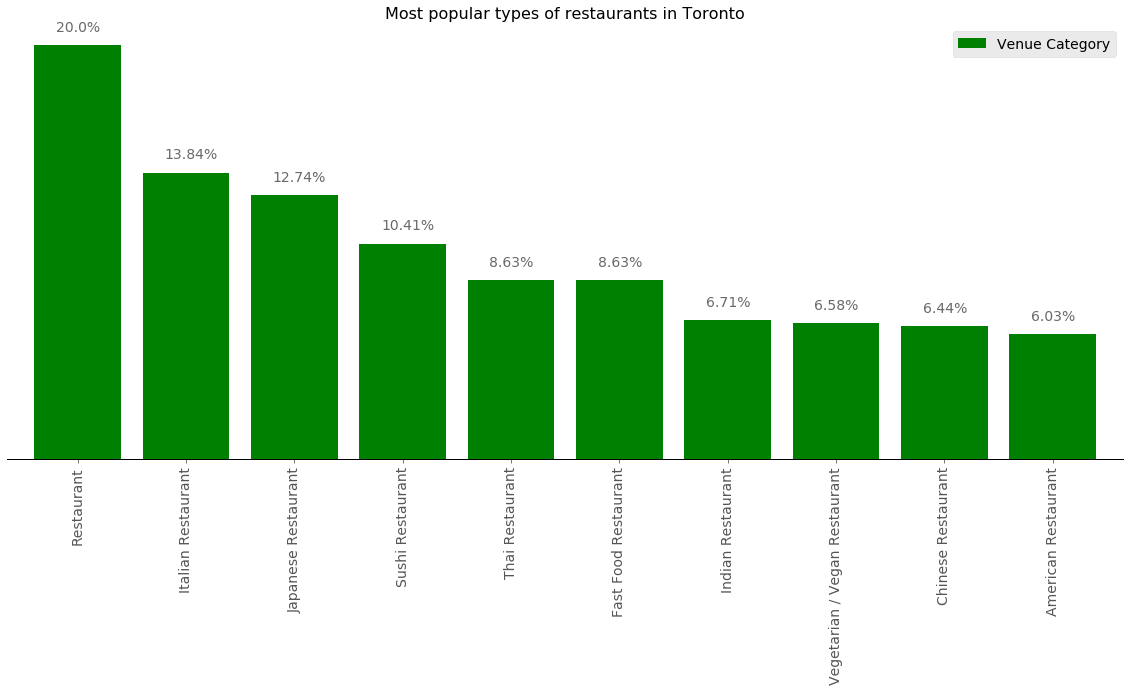

In [1783]:

#c=["#5cb85c","#5bc0de","#d9534f"]
fig = plt.figure()
ax = fig.add_subplot()
ax = rest_df['Venue Category'].value_counts().head(10).plot(kind='bar', width=0.8, color = 'green',figsize = (20,8),  fontsize=14)


ax.set_title("Most popular types of restaurants in Toronto", fontsize=16)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')

ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')
ax.set_facecolor("white")

ax.set_yticks([])
plt.grid(b=None)

ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.legend(prop={'size': 14})


totals = []


for i in ax.patches:
    totals.append(i.get_height())
    
total = sum(totals)
print(total)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+5.0, 
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='dimgrey')
    


730


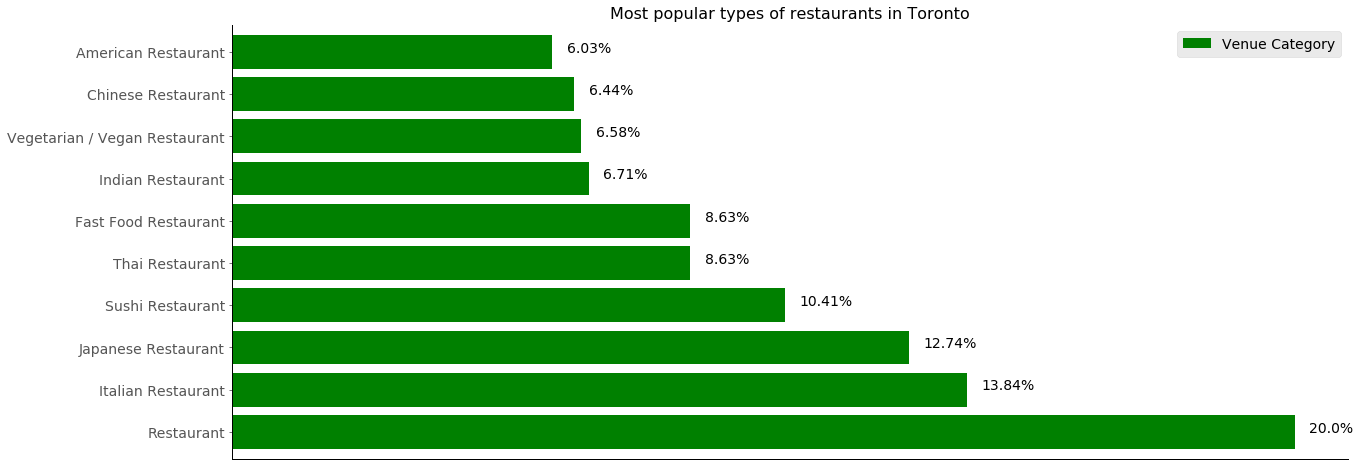

In [1874]:
#c=["#5cb85c","#5bc0de","#d9534f"]
fig = plt.figure()
ax = fig.add_subplot()
ax = rest_df['Venue Category'].value_counts().head(10).plot(kind='barh', width=0.8, color = 'green',figsize = (20,8),  fontsize=14)


ax.set_title("Most popular types of restaurants in Toronto", fontsize=16)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')

ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')
ax.set_facecolor("white")

ax.set_xticks([])
plt.grid(b=None)

ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.legend(prop={'size': 14})


totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)
print(total)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text( i.get_x()+ i.get_width() +2.0, i.get_y()+ i.get_height()/2,
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=14,
                color='black')
    

In [593]:
df_group_merged.values.tolist()

[['M1B',
  'Scarborough',
  'Malvern, Rouge',
  43.806686299999996,
  -79.19435340000001],
 ['M1C',
  'Scarborough',
  'Rouge Hill, Port Union, Highland Creek',
  43.7845351,
  -79.16049709999999],
 ['M1E',
  'Scarborough',
  'Guildwood, Morningside, West Hill',
  43.7635726,
  -79.1887115],
 ['M1G', 'Scarborough', 'Woburn', 43.7709921, -79.21691740000001],
 ['M1H', 'Scarborough', 'Cedarbrae', 43.773136, -79.23947609999999],
 ['M1J', 'Scarborough', 'Scarborough Village', 43.7447342, -79.23947609999999],
 ['M1K',
  'Scarborough',
  'Kennedy Park, Ionview, East Birchmount Park',
  43.7279292,
  -79.26202940000002],
 ['M1L',
  'Scarborough',
  'Golden Mile, Clairlea, Oakridge',
  43.711111700000004,
  -79.2845772],
 ['M1M',
  'Scarborough',
  'Cliffside, Cliffcrest, Scarborough Village West',
  43.716316,
  -79.23947609999999],
 ['M1N',
  'Scarborough',
  'Birch Cliff, Cliffside West',
  43.692657000000004,
  -79.2648481],
 ['M1P',
  'Scarborough',
  'Dorset Park, Wexford Heights, Scarbor

In [751]:
#Making a Neighbourhood list containing Indian restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name']
Indian_rest_to = pd.DataFrame(columns = column_names)
count = 1
for row in df_group_merged.values.tolist():
    PostalCode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant'] 
    print('(',count,'/',len(df_group_merged),')','Indian Resturants in '+Neighbourhood+','+Borough+':'+str(len(indian_resturants)))
    #print('(',count,'/',len(df_group_merged),')','Indian Restaurant in '+Neighbourhood+','+Borough+':'+str(len(indian_restaurants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        Indian_rest_to = Indian_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                                },ignore_index=True)
    count+=1
    
  
        
   
        
    
    
    
    
    

( 1 / 103 ) Indian Resturants in Malvern, Rouge,Scarborough:0
( 2 / 103 ) Indian Resturants in Rouge Hill, Port Union, Highland Creek,Scarborough:0
( 3 / 103 ) Indian Resturants in Guildwood, Morningside, West Hill,Scarborough:0
( 4 / 103 ) Indian Resturants in Woburn,Scarborough:1
( 5 / 103 ) Indian Resturants in Cedarbrae,Scarborough:2
( 6 / 103 ) Indian Resturants in Scarborough Village,Scarborough:0
( 7 / 103 ) Indian Resturants in Kennedy Park, Ionview, East Birchmount Park,Scarborough:0
( 8 / 103 ) Indian Resturants in Golden Mile, Clairlea, Oakridge,Scarborough:0
( 9 / 103 ) Indian Resturants in Cliffside, Cliffcrest, Scarborough Village West,Scarborough:0
( 10 / 103 ) Indian Resturants in Birch Cliff, Cliffside West,Scarborough:0
( 11 / 103 ) Indian Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre,Scarborough:2
( 12 / 103 ) Indian Resturants in Wexford, Maryvale,Scarborough:1
( 13 / 103 ) Indian Resturants in Agincourt,Scarborough:1
( 14 / 103 ) Indian Restur

In [752]:
Indian_rest_to.head(-1)

,Borough,Neighborhood,ID,Name
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant
5,Scarborough,"Wexford, Maryvale",4c27cddd9fb5d13a8cab9857,Patna Kebab House
6,Scarborough,Agincourt,4d570727fb65236a7f600db4,Silver Spoon Pak-Indian Restaurant
7,Scarborough,"Steeles West, L'Amoreaux West",4efccc9bb8f701ff611ce191,Nantha's Bakery
8,North York,"Willowdale, Newtonbrook",4b43dde2f964a52099ec25e3,Earth Indian Restaurant
9,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro


In [783]:
#Making a Neighbourhood list containing Bangladeshi restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name']
bangladeshi_rest_to = pd.DataFrame(columns = column_names)
count = 1
for row in df_group_merged.values.tolist():
    PostalCode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    bangladeshi_resturants=venues[venues['Category']=='Bangladeshi'] 
    print('(',count,'/',len(df_group_merged),')','Bangladeshi Resturants in '+Neighbourhood+','+Borough+':'+str(len(indian_resturants)))
    #print('(',count,'/',len(df_group_merged),')','Indian Restaurant in '+Neighbourhood+','+Borough+':'+str(len(indian_restaurants)))
    for resturant_detail in bangladeshi_resturants.values.tolist():
        id, name , category=resturant_detail
        bangladeshi_rest_to = Indian_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                                },ignore_index=True)
    count+=1
    
  
        
   
        
    
    
    
    
    

( 1 / 103 ) Bangladeshi Resturants in Malvern, Rouge,Scarborough:0
( 2 / 103 ) Bangladeshi Resturants in Rouge Hill, Port Union, Highland Creek,Scarborough:0
( 3 / 103 ) Bangladeshi Resturants in Guildwood, Morningside, West Hill,Scarborough:0
( 4 / 103 ) Bangladeshi Resturants in Woburn,Scarborough:0
( 5 / 103 ) Bangladeshi Resturants in Cedarbrae,Scarborough:0
( 6 / 103 ) Bangladeshi Resturants in Scarborough Village,Scarborough:0
( 7 / 103 ) Bangladeshi Resturants in Kennedy Park, Ionview, East Birchmount Park,Scarborough:0
( 8 / 103 ) Bangladeshi Resturants in Golden Mile, Clairlea, Oakridge,Scarborough:0
( 9 / 103 ) Bangladeshi Resturants in Cliffside, Cliffcrest, Scarborough Village West,Scarborough:0
( 10 / 103 ) Bangladeshi Resturants in Birch Cliff, Cliffside West,Scarborough:0
( 11 / 103 ) Bangladeshi Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre,Scarborough:0
( 12 / 103 ) Bangladeshi Resturants in Wexford, Maryvale,Scarborough:0
( 13 / 103 ) Bangladeshi

( 99 / 103 ) Bangladeshi Resturants in Weston,York:0
( 100 / 103 ) Bangladeshi Resturants in Westmount,Etobicoke:0
( 101 / 103 ) Bangladeshi Resturants in Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens,Etobicoke:0
( 102 / 103 ) Bangladeshi Resturants in South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens,Etobicoke:0
( 103 / 103 ) Bangladeshi Resturants in Northwest, West Humber - Clairville,Etobicoke:0


In [1186]:
df_group_merged.groupby('Borough')['Neighbourhood'].count()


Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64

In [768]:
bangladeshi_rest_to['Borough'].value_counts()

Series([], Name: Borough, dtype: int64)

In [785]:
#Making a Neighbourhood list containing Pakistani restaurants

column_names=['Borough', 'Neighborhood', 'ID','Name']
pakistani_rest_to = pd.DataFrame(columns = column_names)
count = 1
for row in df_group_merged.values.tolist():
    PostalCode, Borough, Neighbourhood, Latitude, Longitude = row
    venues = get_venues(Latitude,Longitude)
    pakistani_resturants=venues[venues['Category']=='Pakistani'] 
    print('(',count,'/',len(df_group_merged),')','Pakistani Resturants in '+Neighbourhood+','+Borough+':'+str(len(indian_resturants)))
    #print('(',count,'/',len(df_group_merged),')','Indian Restaurant in '+Neighbourhood+','+Borough+':'+str(len(indian_restaurants)))
    for resturant_detail in pakistani_resturants.values.tolist():
        id, name , category=resturant_detail
        pakistani_rest_to = pakistani_rest_to.append({'Borough': Borough,
                                                'Neighborhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                                },ignore_index=True)
    count+=1
    
  
        
   

( 1 / 103 ) Pakistani Resturants in Malvern, Rouge,Scarborough:0
( 2 / 103 ) Pakistani Resturants in Rouge Hill, Port Union, Highland Creek,Scarborough:0
( 3 / 103 ) Pakistani Resturants in Guildwood, Morningside, West Hill,Scarborough:0
( 4 / 103 ) Pakistani Resturants in Woburn,Scarborough:0
( 5 / 103 ) Pakistani Resturants in Cedarbrae,Scarborough:0
( 6 / 103 ) Pakistani Resturants in Scarborough Village,Scarborough:0
( 7 / 103 ) Pakistani Resturants in Kennedy Park, Ionview, East Birchmount Park,Scarborough:0
( 8 / 103 ) Pakistani Resturants in Golden Mile, Clairlea, Oakridge,Scarborough:0
( 9 / 103 ) Pakistani Resturants in Cliffside, Cliffcrest, Scarborough Village West,Scarborough:0
( 10 / 103 ) Pakistani Resturants in Birch Cliff, Cliffside West,Scarborough:0
( 11 / 103 ) Pakistani Resturants in Dorset Park, Wexford Heights, Scarborough Town Centre,Scarborough:0
( 12 / 103 ) Pakistani Resturants in Wexford, Maryvale,Scarborough:0
( 13 / 103 ) Pakistani Resturants in Agincourt,S

( 102 / 103 ) Pakistani Resturants in South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens,Etobicoke:0
( 103 / 103 ) Pakistani Resturants in Northwest, West Humber - Clairville,Etobicoke:0


In [786]:
pakistani_rest_to

,Borough,Neighborhood,ID,Name


In [772]:
Indian_rest_to['Neighborhood'].value_counts().nlargest(10)

India Bazaar, The Beaches West                           6
Davisville                                               3
Thorncliffe Park                                         3
Canada Post Gateway Processing Centre                    2
Christie                                                 2
Regent Park, Harbourfront                                2
Church and Wellesley                                     2
Brockton, Parkdale Village, Exhibition Place             2
Dorset Park, Wexford Heights, Scarborough Town Centre    2
Cedarbrae                                                2
Name: Neighborhood, dtype: int64

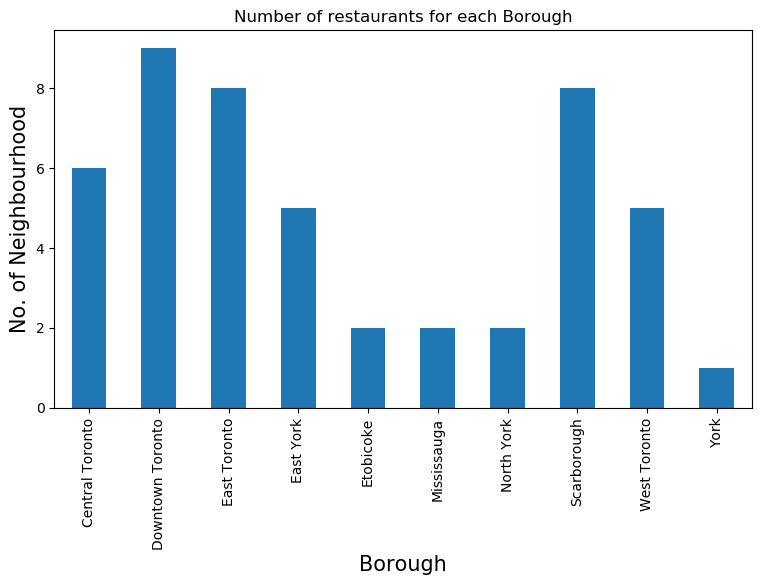

In [1238]:
plt.figure(figsize = (9,5), dpi = 100)
#title
plt.title('Number of restaurants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No. of Neighbourhood', fontsize = 15)
#plotting a bar chart
#df_group_merged.groupby('Borough')['Neighbourhood'].count().plot(kind = 'bar')
Indian_rest_to.groupby('Borough')['ID'].count().plot(kind = 'bar')

In [978]:
Indian_rest_to.groupby('Borough')['ID'].count()

Borough
Central Toronto     6
Downtown Toronto    9
East Toronto        8
East York           5
Etobicoke           2
Mississauga         2
North York          2
Scarborough         8
West Toronto        5
York                1
Name: ID, dtype: int64

In [1292]:
Indian_rest_to.head()

,Borough,Neighborhood,ID,Name
0,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
1,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc
2,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill
3,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",5226562611d2cd49d83ef03b,Kairali
4,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant


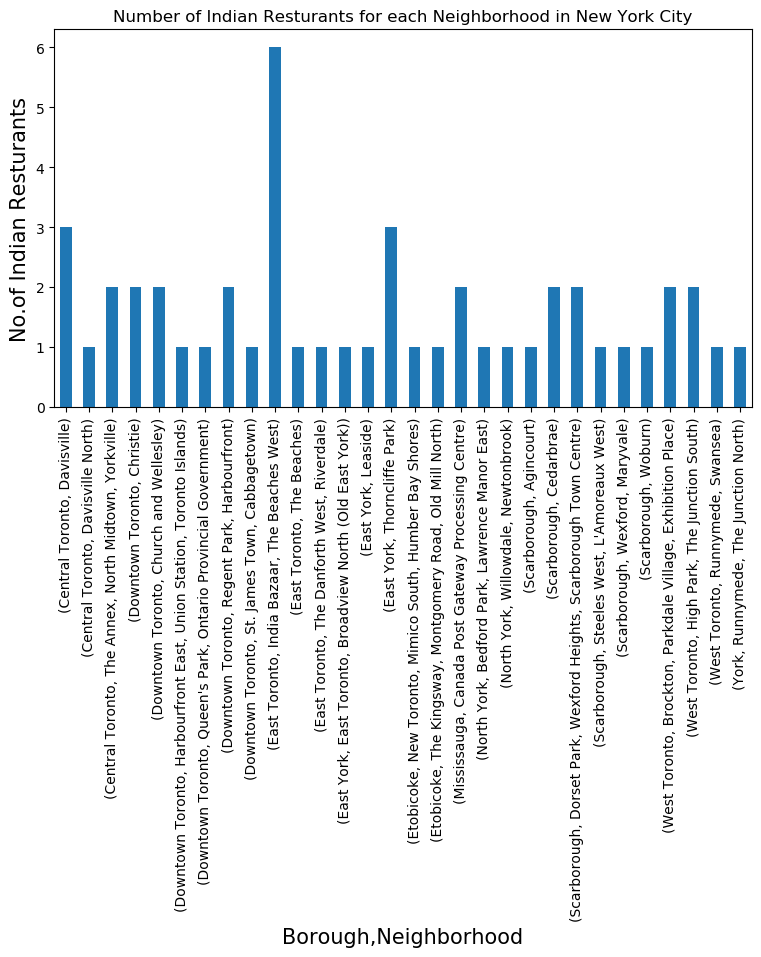

In [1675]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#plotting a bar chart
#df_group_merged.groupby('Borough')['Neighbourhood'].count().plot(kind = 'bar')
Indian_rest_to.groupby(['Borough','Neighborhood'])['ID'].count().plot(kind = 'bar')

In [1279]:
Indian_rest_to.groupby(['Borough','Neighborhood'])['ID'].count().nlargest(10)

Borough           Neighborhood                                         
East Toronto      India Bazaar, The Beaches West                           6
Central Toronto   Davisville                                               3
East York         Thorncliffe Park                                         3
Central Toronto   The Annex, North Midtown, Yorkville                      2
Downtown Toronto  Christie                                                 2
                  Church and Wellesley                                     2
                  Regent Park, Harbourfront                                2
Mississauga       Canada Post Gateway Processing Centre                    2
Scarborough       Cedarbrae                                                2
                  Dorset Park, Wexford Heights, Scarborough Town Centre    2
Name: ID, dtype: int64

In [132]:
#Creating a new dataframe to display the data in the way asked in the assignment
final_df = pd.DataFrame(columns = ['Postal Code', 'Borough', 'Neighbourhood']) 
print(final_df) 

Empty DataFrame
Columns: [Postal Code, Borough, Neighbourhood]
Index: []


In [602]:
#reshaping the dataframe in the way it's asked in the assignment
for i in post_code_list:
    final_df = final_df.append(df_group_merged[df_group_merged['Postal Code'] ==  i]).reset_index(drop = True)

In [1866]:
#checking if the dataframe matches the what was asked in the assignment 
final_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
1,M2H,North York,Hillcrest Village,43.803762,-79.363452
2,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
3,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
4,M4G,East York,Leaside,43.709060,-79.363452
5,M4M,East Toronto,Studio District,43.659526,-79.340923
6,M1R,Scarborough,"Wexford, Maryvale",43.750072,-79.295849
7,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437
8,M9L,North York,Humber Summit,43.756303,-79.565963
9,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420


In [1543]:
# one hot encoding
#function called to retrieve venue related data is 
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")




In [1544]:
toronto_onehot.shape

(4878, 333)

In [1545]:
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighborhood'] 

In [1546]:
toronto_onehot.shape

(4878, 334)

In [1547]:
toronto_onehot.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Malvern, Rouge"


In [1548]:
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,"South Steeles, Silverstone, Humbergate, Jamest...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4874,"South Steeles, Silverstone, Humbergate, Jamest...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4875,"Northwest, West Humber - Clairville",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4876,"Northwest, West Humber - Clairville",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1549]:
toronto_onehot.shape

(4878, 334)

In [1574]:
toronto_onehot.to_excel(r'./a.xlsx', index = False)

In [1551]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()


In [1552]:
tg = toronto_onehot.groupby('Neighbourhood').sum().reset_index()

In [1617]:
tg.to_excel(r'./b.xlsx', index = False)

In [1593]:
toronto_onehot['Indian Restaurant'].value_counts()

0    4829
1      49
Name: Indian Restaurant, dtype: int64

In [1555]:
toronto_grouped.dtypes

Neighbourhood         object
Accessories Store    float64
Adult Boutique       float64
Afghan Restaurant    float64
Airport              float64
                      ...   
Wine Shop            float64
Wings Joint          float64
Women's Store        float64
Yoga Studio          float64
Zoo                  float64
Length: 334, dtype: object

In [1557]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    


----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.15
1         Shopping Mall  0.06
2  Caribbean Restaurant  0.04
3                Bakery  0.04
4           Pizza Place  0.04


----Alderwood, Long Branch----
            venue  freq
0  Discount Store  0.12
1     Pizza Place  0.08
2        Pharmacy  0.08
3  Sandwich Place  0.04
4           Trail  0.04


----Bathurst Manor, Wilson Heights, Downsview North----
                venue  freq
0         Coffee Shop  0.06
1         Pizza Place  0.06
2                Park  0.06
3                Bank  0.06
4  Frozen Yogurt Shop  0.03


----Bayview Village----
                 venue  freq
0                 Bank  0.13
1        Grocery Store  0.13
2  Japanese Restaurant  0.13
3          Gas Station  0.13
4         Skating Rink  0.07


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.08
1         Coffee Shop  0.08
2      Sandwich Place  0.05
3                Bank  0.05
4        Skatin

                           venue  freq
0                           Café  0.10
1  Vegetarian / Vegan Restaurant  0.06
2                            Bar  0.05
3                    Coffee Shop  0.04
4                    Yoga Studio  0.03


----Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens----
         venue  freq
0     Pharmacy  0.14
1     Bus Line  0.07
2  Supermarket  0.07
3   Beer Store  0.07
4         Bank  0.07


----Lawrence Manor, Lawrence Heights----
                    venue  freq
0          Clothing Store  0.06
1              Restaurant  0.06
2             Coffee Shop  0.06
3    Fast Food Restaurant  0.06
4  Furniture / Home Store  0.06


----Lawrence Park----
                  venue  freq
0                  Café  0.22
1                  Park  0.11
2  Gym / Fitness Center  0.11
3           Coffee Shop  0.11
4                 Trail  0.11


----Leaside----
                    venue  freq
0             Coffee Shop  0.07
1     Sporting Goods Shop  0.07
2    

              venue  freq
0              Park  0.25
1        Restaurant  0.19
2               Gym  0.06
3  Business Service  0.06
4     Grocery Store  0.06


----York Mills, Silver Hills----
                     venue  freq
0                     Park  0.75
1                     Pool  0.25
2        Accessories Store  0.00
3  New American Restaurant  0.00
4          Organic Grocery  0.00




In [1594]:
toronto_grouped.groupby('Neighbourhood')['India Restaurant'].sum().sort_values(ascending = False).head(10)

Neighbourhood
Woburn                                                   0.111111
India Bazaar, The Beaches West                           0.087500
Cedarbrae                                                0.071429
Thorncliffe Park                                         0.060000
New Toronto, Mimico South, Humber Bay Shores             0.055556
Dorset Park, Wexford Heights, Scarborough Town Centre    0.051282
Canada Post Gateway Processing Centre                    0.039216
Wexford, Maryvale                                        0.037037
Willowdale, Newtonbrook                                  0.035714
Steeles West, L'Amoreaux West                            0.033333
Name: Indian Restaurant, dtype: float64

In [1595]:
toronto_grouped.groupby('Neighbourhood')['Accessories Store'].sum().sort_values(ascending = False).head(10)

Neighbourhood
Dorset Park, Wexford Heights, Scarborough Town Centre            0.025641
Lawrence Manor, Lawrence Heights                                 0.020833
Brockton, Parkdale Village, Exhibition Place                     0.010000
Harbourfront East, Union Station, Toronto Islands                0.000000
East Toronto, Broadview North (Old East York)                    0.000000
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood    0.000000
Fairview, Henry Farm, Oriole                                     0.000000
First Canadian Place, Underground city                           0.000000
Forest Hill North & West, Forest Hill Road Park                  0.000000
Garden District, Ryerson                                         0.000000
Name: Accessories Store, dtype: float64

In [1570]:
tg.groupby('Neighbourhood')['Indian Restaurant'].sum().sort_values(ascending = False).head(50)
                                                                                        

Neighbourhood
India Bazaar, The Beaches West                                            7
Davisville                                                                3
Thorncliffe Park                                                          3
Brockton, Parkdale Village, Exhibition Place                              2
Canada Post Gateway Processing Centre                                     2
Cedarbrae                                                                 2
Christie                                                                  2
Church and Wellesley                                                      2
Regent Park, Harbourfront                                                 2
Dorset Park, Wexford Heights, Scarborough Town Centre                     2
The Annex, North Midtown, Yorkville                                       2
Leaside                                                                   1
Moore Park, Summerhill East                                               

Text(0, 0.5, 'Number of restaurant per Neighbourhood')

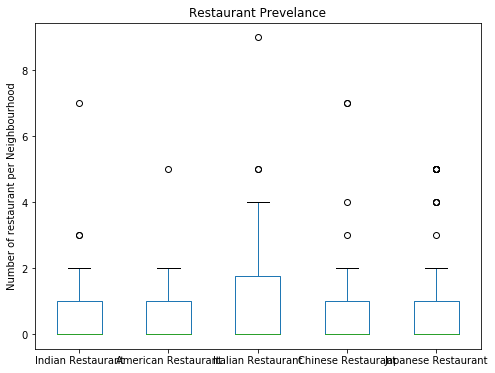

In [1654]:
tg.groupby('Neighbourhood')[['Indian Restaurant', 'American Restaurant', 'Italian Restaurant', 'Chinese Restaurant', 'Japanese Restaurant']].sum().plot(kind='box', figsize=(8, 6))
plt.title('Restaurant Prevelance')
plt.ylabel('Number of restaurant per Neighbourhood')

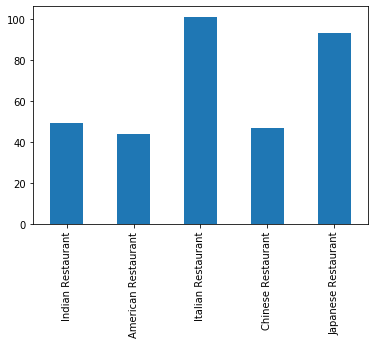

In [1676]:
tg[['Indian Restaurant', 'American Restaurant', 'Italian Restaurant', 'Chinese Restaurant', 'Japanese Restaurant']].sum().transpose().head(5).plot(kind = 'bar')

In [1592]:
tg.shape

(98, 334)

In [1563]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    
    #print("I am here")
    row_categories_sorted = row_categories.sort_values(ascending=False)
    #print(row_categories_sorted.index.values[0:num_top_venues])
    return row_categories_sorted.index.values[0:num_top_venues]

In [1564]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
    
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Sandwich Place,Pizza Place,Caribbean Restaurant,Bakery,Cantonese Restaurant,Lounge,Breakfast Spot,Latin American Restaurant
1,"Alderwood, Long Branch",Discount Store,Pizza Place,Pharmacy,Grocery Store,Donut Shop,Garden Center,Gas Station,Liquor Store,Coffee Shop,Intersection
2,"Bathurst Manor, Wilson Heights, Downsview North",Pizza Place,Park,Coffee Shop,Bank,Bridal Shop,Ski Area,Fried Chicken Joint,Sushi Restaurant,Supermarket,Mediterranean Restaurant
3,Bayview Village,Bank,Gas Station,Grocery Store,Japanese Restaurant,Intersection,Café,Trail,Restaurant,Park,Chinese Restaurant
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Bank,Sandwich Place,Comfort Food Restaurant,Skating Rink,Bakery,Intersection,Sushi Restaurant,Juice Bar


In [1565]:
row=toronto_grouped.iloc[0, :]

In [1566]:
row_categories = row.iloc[1:]

In [1567]:
row_categories.sort_values(ascending=False)

Chinese Restaurant       0.148936
Shopping Mall           0.0638298
Sandwich Place          0.0425532
Pizza Place             0.0425532
Caribbean Restaurant    0.0425532
                          ...    
Music School                    0
Music Store                     0
Music Venue                     0
Nail Salon                      0
Accessories Store               0
Name: 0, Length: 333, dtype: object

In [1568]:
 neighbourhoods_venues_sorted.iloc[1, 1:]

1st Most Common Venue     Discount Store
2nd Most Common Venue        Pizza Place
3rd Most Common Venue           Pharmacy
4th Most Common Venue      Grocery Store
5th Most Common Venue         Donut Shop
6th Most Common Venue      Garden Center
7th Most Common Venue        Gas Station
8th Most Common Venue       Liquor Store
9th Most Common Venue        Coffee Shop
10th Most Common Venue      Intersection
Name: 1, dtype: object

In [378]:
toronto_grouped.iloc[0, :]

Neighbourhood            Agincourt
Women's Store                    0
Yoga Studio                      0
Accessories Store                0
Afghan Restaurant                0
                           ...    
Video Game Store                 0
Vietnamese Restaurant            0
Warehouse Store                  0
Wine Bar                         0
Wings Joint                      0
Name: 0, Length: 274, dtype: object

In [1569]:
toronto_grouped

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.021277,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
94,Woburn,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
95,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
96,York Mills West,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [1285]:
neighbourhoods_venues_sorted[neighbourhoods_venues_sorted['1st Most Common Venue'] == "Indian Restaurant"]

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,1,"Dorset Park, Wexford Heights, Scarborough Town...",Indian Restaurant,Pet Store,Vietnamese Restaurant,Chinese Restaurant,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


In [ ]:
neighbourhoods_venues_sorted.query('1st Most Common Venue=="Bank"')

In [338]:
neighbourhoods_venues_sorted.columns

Index(['Neighbourhood', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [483]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [422]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



In [478]:
neighbourhoods_venues_sorted.shape

(96, 12)

In [479]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 1, 1, 1, 1, 0, 2])

In [424]:
toronto_grouped.shape

(96, 274)

In [430]:
toronto_merged = df_group_merged

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4.0,Fast Food Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore,Falafel Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1.0,Bar,Construction & Landscaping,Wings Joint,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1.0,Rental Car Location,Bank,Intersection,Mexican Restaurant,Medical Center,Breakfast Spot,Electronics Store,Restaurant,Dumpling Restaurant,Drugstore
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1.0,Coffee Shop,Mexican Restaurant,Korean BBQ Restaurant,Wings Joint,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1.0,Hakka Restaurant,Thai Restaurant,Bank,Bakery,Fried Chicken Joint,Gas Station,Caribbean Restaurant,Athletics & Sports,Coworking Space,Creperie


In [433]:
toronto_merged.iloc[-1:]

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,M9W,Etobicoke,"Northwest, West Humber - Clairville",43.706748,-79.594054,1.0,Rental Car Location,Drugstore,Garden Center,Bar,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Escape Room,Donut Shop,Department Store


In [553]:
toronto_merged.isnull().values.any()

False

In [554]:
toronto_merged.isnull().sum().sum()


0

In [555]:
toronto_merged.isnull().sum()

Postal Code               0
Borough                   0
Neighbourhood             0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [570]:
toronto_merged = toronto_merged.dropna()

In [571]:
import matplotlib.colors as colors

In [572]:
# create map
map_clusterd = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



In [457]:
ys

[array([0, 1, 2, 3, 4]),
 array([ 1,  3,  7, 13, 21]),
 array([ 2,  7, 20, 41, 70]),
 array([  3,  13,  41,  87, 151]),
 array([  4,  21,  70, 151, 264])]

In [565]:
rainbow

[]

In [472]:
colors_array.dtype

dtype('float64')

In [541]:
toronto_merged.dropna(subset='Cluster Labels')

TypeError: Index(...) must be called with a collection of some kind, 'Cluster Labels' was passed

In [549]:
toronto_merged['Cluster Labels'] =toronto_merged['Cluster Labels'].astype(int)

C:\Users\qazi.mussabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [573]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [560]:
toronto_merged.dtypes

Postal Code                object
Borough                    object
Neighbourhood              object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [500]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 1, 1, 1, 1, 0, 2])

In [511]:
toronto_merged[toronto_merged['Cluster Labels'] == 4].count()

Postal Code               1
Borough                   1
Neighbourhood             1
Latitude                  1
Longitude                 1
Cluster Labels            1
1st Most Common Venue     1
2nd Most Common Venue     1
3rd Most Common Venue     1
4th Most Common Venue     1
5th Most Common Venue     1
6th Most Common Venue     1
7th Most Common Venue     1
8th Most Common Venue     1
9th Most Common Venue     1
10th Most Common Venue    1
dtype: int64

In [574]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,0,Park,Playground,Bakery,Intersection,Electronics Store,Eastern European Restaurant,Escape Room,Dumpling Restaurant,Drugstore,Dessert Shop
23,North York,0,Park,Convenience Store,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dessert Shop,Drugstore
25,North York,0,Park,Food & Drink Shop,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
40,East York,0,Park,Convenience Store,Intersection,Ethiopian Restaurant,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop
44,Central Toronto,0,Park,Bus Line,Swim School,Escape Room,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Doner Restaurant
50,Downtown Toronto,0,Park,Playground,Trail,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
74,York,0,Park,Pool,Women's Store,Grocery Store,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
79,North York,0,Park,Bakery,Construction & Landscaping,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
98,York,0,Park,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore,College Rec Center


In [578]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,1,Bar,Construction & Landscaping,Wings Joint,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
2,Scarborough,1,Rental Car Location,Bank,Intersection,Mexican Restaurant,Medical Center,Breakfast Spot,Electronics Store,Restaurant,Dumpling Restaurant,Drugstore
3,Scarborough,1,Coffee Shop,Mexican Restaurant,Korean BBQ Restaurant,Wings Joint,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,Scarborough,1,Hakka Restaurant,Thai Restaurant,Bank,Bakery,Fried Chicken Joint,Gas Station,Caribbean Restaurant,Athletics & Sports,Coworking Space,Creperie
5,Scarborough,1,Smoke Shop,Playground,Jewelry Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
...,...,...,...,...,...,...,...,...,...,...,...,...
97,North York,1,Baseball Field,Wings Joint,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
99,Etobicoke,1,Discount Store,Pizza Place,Coffee Shop,Sandwich Place,Intersection,Chinese Restaurant,Wings Joint,Dog Run,Dim Sum Restaurant,Diner
100,Etobicoke,1,Park,Bus Line,Pizza Place,Sandwich Place,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
101,Etobicoke,1,Pizza Place,Grocery Store,Fast Food Restaurant,Sandwich Place,Beer Store,Fried Chicken Joint,Pharmacy,Liquor Store,Dumpling Restaurant,Eastern European Restaurant


In [579]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,North York,2,Martial Arts School,Wings Joint,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant


In [1280]:
Indian_rest_to.groupby(['Borough','Neighborhood'])['ID'].count().nlargest(10)

Borough           Neighborhood                                         
East Toronto      India Bazaar, The Beaches West                           6
Central Toronto   Davisville                                               3
East York         Thorncliffe Park                                         3
Central Toronto   The Annex, North Midtown, Yorkville                      2
Downtown Toronto  Christie                                                 2
                  Church and Wellesley                                     2
                  Regent Park, Harbourfront                                2
Mississauga       Canada Post Gateway Processing Centre                    2
Scarborough       Cedarbrae                                                2
                  Dorset Park, Wexford Heights, Scarborough Town Centre    2
Name: ID, dtype: int64

Characteristic
Bangladeshi    18155
Name: CityofToronto, dtype: object

In [1201]:
df_group_merged.groupby('Borough')['Neighbourhood'].count()

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64